https://drive.google.com/file/d/1Yb4ljRXRQfTmcLOac_5w-pLpvPdFPvnc/view?usp=sharing

**Credit Card Dataset for Clustering' dataset provided by Kaggle**
 
- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account 
- CASH_ADVANCE: Cash in advance given by the user
- CREDIT_LIMIT: Limit of Credit Card for user 
- PAYMENTS: Amount of Payment done by user 

Instructions

- Import data and perform basic data exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Then, plot the clusters
- Find the best k value and plot the clusters again.
- Interpret the results

In [194]:
import pandas as pd
import numpy as np
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import  stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import AgglomerativeClustering, KMeans
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [195]:
df = pd.read_csv('C:\\Users\\Hp\\Desktop\\dataset\\Machine learning\\unsupervised learning\\Credit_card_dataset.csv')
df.head()

CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [197]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [198]:
df.dropna(inplace=True)

In [199]:
df.describe()

BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8949.000000   8949.000000   8949.000000   8949.000000   
mean            0.877350   1003.316936   1733.336511   4494.449450   
std             0.236798   2136.727848   2895.168146   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.800000    383.282850   1600.000000   
50%             1.000000    361.490000    857.062706   3000.000000   
75%             1.000000   1110.170000   1901.279320   6500.000000   
max             1.000000  49039.570000  50721.483360  30000.000000   

       CASH_ADVANCE  
count   8949.000000  
mean     978.959616  
std     2097.264344  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%     1113.868654  
max    47137.211760

In [200]:
df['CUST_ID'].unique()


array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

In [201]:
df['CUST_ID'] = df['CUST_ID'].str[1:].astype(int)
df['CUST_ID'].dtype

dtype('int64')

In [202]:
df['CUST_ID'].unique()

array([10001, 10002, 10003, ..., 19188, 19189, 19190])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   int64  
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 489.4 KB


In [204]:
# Profiling :
ydadata_profiling = ProfileReport(df, explorative=True, title='Credit card report')
ydadata_profiling.to_notebook_iframe()
ydadata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

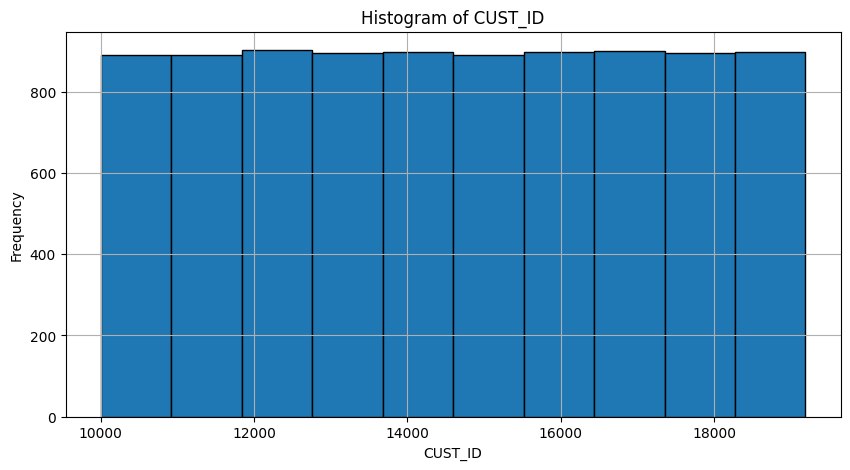

<Figure size 640x480 with 0 Axes>

In [205]:
plt.figure(figsize=(10, 5))
df['CUST_ID'].hist(bins=10, edgecolor='black')
plt.title('Histogram of CUST_ID')
plt.xlabel('CUST_ID')
plt.ylabel('Frequency')
plt.show()
plt.savefig('cust_id_histogram.png')

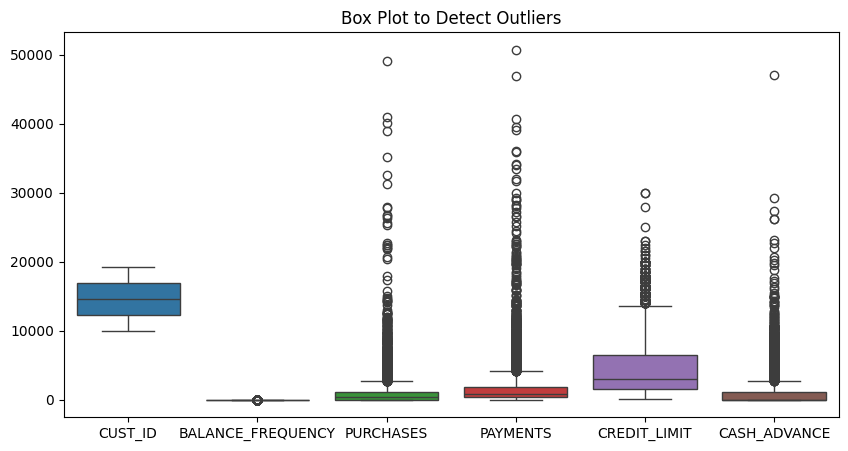

<Figure size 640x480 with 0 Axes>

In [206]:
plt.figure(figsize=(10, 5)) 
sns.boxplot(data=df) 
plt.title('Box Plot to Detect Outliers') 
plt.show()
plt.savefig('box_plot_outliers_cust_id.png')

**OUTLIERS :**

In [207]:
df.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [208]:
# Z-SCORE :
z_score = stats.zscore(df[['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']])
# outliers
outliers = (z_score > 3) | (z_score < -3)
outliers_df = df[outliers.any(axis=1)]
# Cleaner data :
df_cleaned_zscores = df[~outliers.any(axis=1)]
df_cleaned_zscores.shape

(8483, 6)

In [209]:
# IQR Method (Interquartile Range): 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
# outliers_df_iqr = df[outliers_iqr.any(axis=1)]
# Cleaner data :
df_cleaned_iqr = df[~outliers_iqr.any(axis=1)]
df_cleaned_iqr.shape

(5620, 6)

In [210]:
# Isolation Forest
df_iso_forest = df.copy() 
# Apply Isolation Forest to detect outliers 
iso_forest = IsolationForest(contamination=0.1, random_state=42) 
df_iso_forest['Outlier_IF'] = iso_forest.fit_predict(df_iso_forest[['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']]) 
# Filter out the outliers 
df_cleaned_iso_forest = df_iso_forest[df_iso_forest['Outlier_IF'] != -1].drop(columns=['Outlier_IF']) 
df_cleaned_iso_forest.shape

(8054, 6)

In [211]:
# Local Outlier Factor
df_lof = df.copy()
# Apply Local Outlier Factor to detect outliers
lof = LocalOutlierFactor(n_neighbors=20)
y_pred_lof = lof.fit_predict(df_lof[['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']])
df_lof['Outlier_LOF'] = y_pred_lof
# Filter out the outliers
df_cleaned_lof = df_lof[df_lof['Outlier_LOF'] != -1].drop(columns=['Outlier_LOF'])
df_cleaned_lof.shape

(8665, 6)

**Visualisation des dataframe apres nettoyage des outliers avec multiples methodes** 

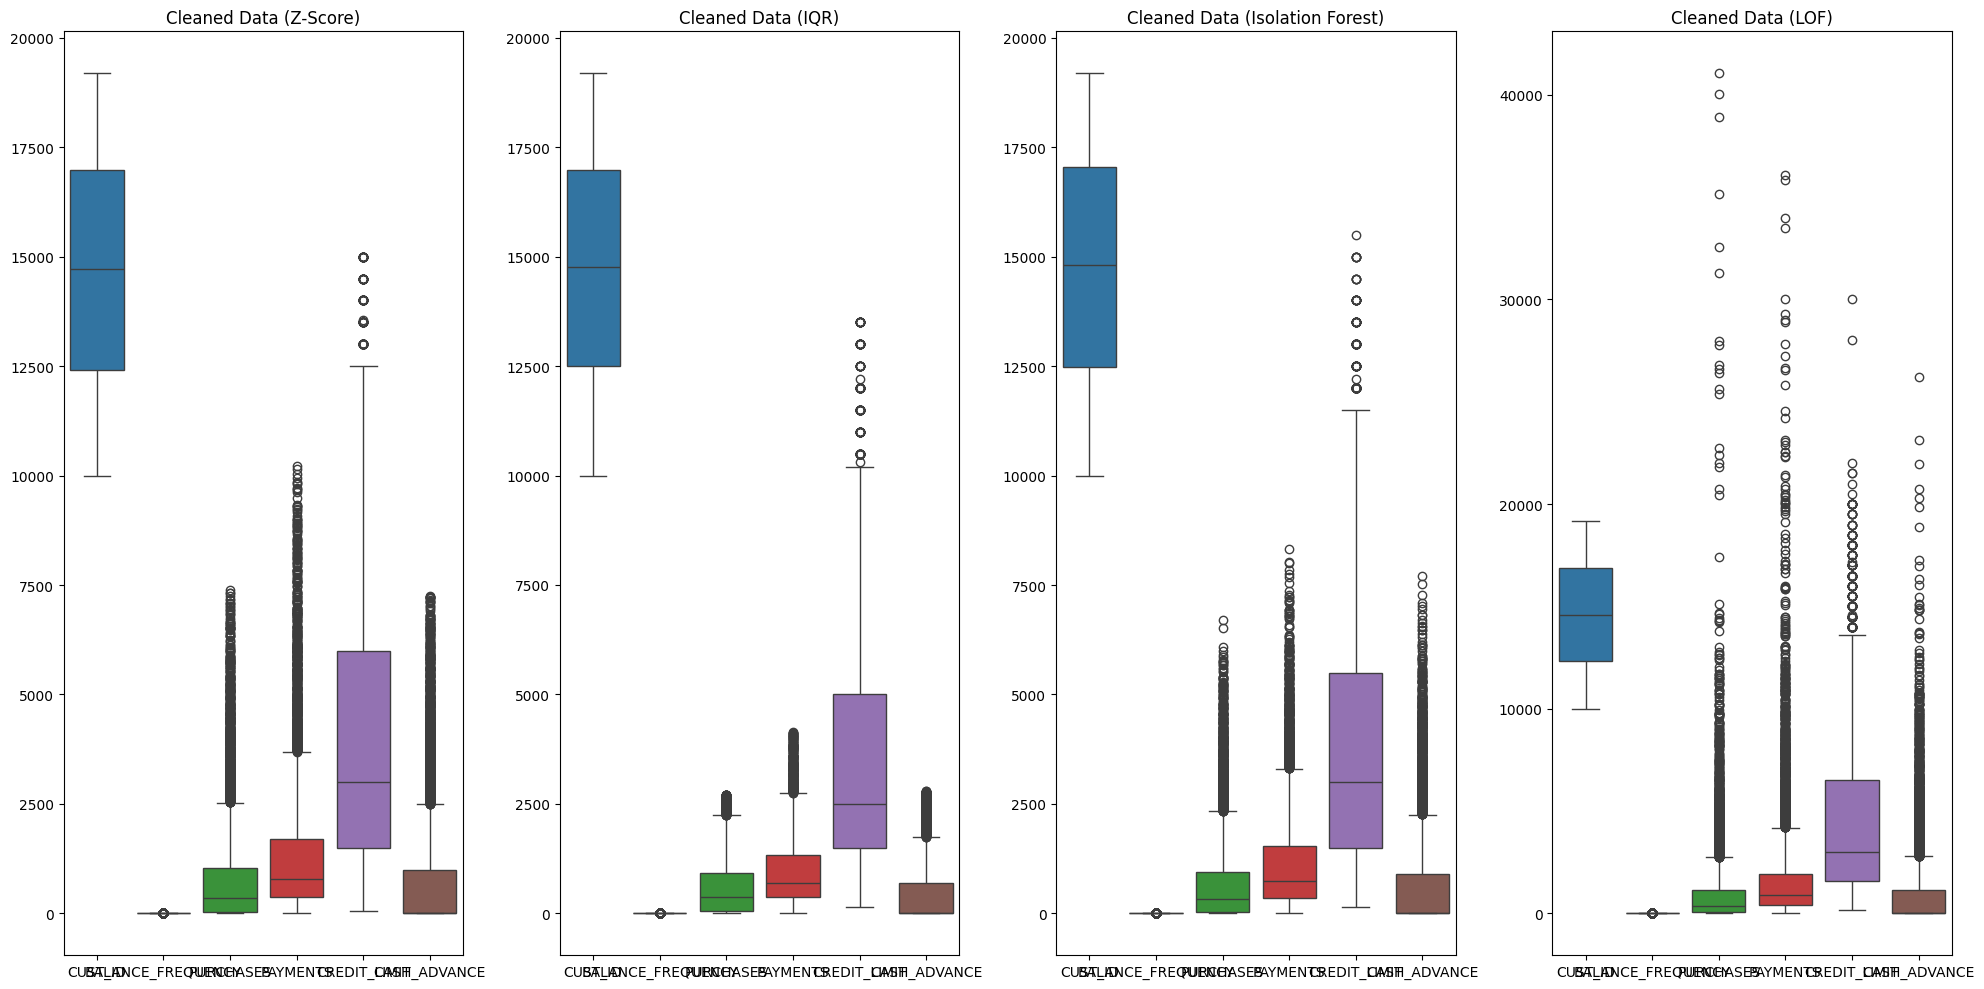

In [212]:
# Function to create and save box plot 
%matplotlib inline

def show_box_plots(*dataframes, titles):
    n = len(dataframes)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 10))

    for i, dataframe in enumerate(dataframes):
        sns.boxplot(data=dataframe, ax=axes[i])
        axes[i].set_title(titles[i], loc='center')

    plt.tight_layout()
    plt.show()

# Show box plots for all cleaned DataFrames
show_box_plots(
    df_cleaned_zscores, df_cleaned_iqr, df_cleaned_iso_forest, df_cleaned_lof,
    titles=['Cleaned Data (Z-Score)', 'Cleaned Data (IQR)', 'Cleaned Data (Isolation Forest)', 'Cleaned Data (LOF)']
)



In [213]:
print(f'Shape of original data is: {df.shape}')
print(f'Shape of df_cleaned_zscores is : {df_cleaned_zscores.shape}')
print(f'Shape of df_claened_iqr is : {df_cleaned_iqr.shape}')
print(f'Shape of df_cleaned_iso_forest is : {df_cleaned_iso_forest.shape}')
print(f'Shape of df_cleaned_lof is : {df_cleaned_lof.shape}')



Shape of original data is: (8949, 6)
Shape of df_cleaned_zscores is : (8483, 6)
Shape of df_claened_iqr is : (5620, 6)
Shape of df_cleaned_iso_forest is : (8054, 6)
Shape of df_cleaned_lof is : (8665, 6)


In [214]:
df_zscore = df_cleaned_zscores.copy()
df_iqr = df_cleaned_iqr.copy()
df_iso = df_cleaned_iso_forest.copy()
df_lof = df_cleaned_lof.copy()

Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

In [215]:
df_zscore[['PURCHASES', 'CREDIT_LIMIT']].describe()

PURCHASES  CREDIT_LIMIT
count  8483.000000   8483.000000
mean    798.111657   4079.043750
std    1153.886627   3051.053656
min       0.000000     50.000000
25%      39.915000   1500.000000
50%     349.920000   3000.000000
75%    1037.130000   6000.000000
max    7387.830000  15000.000000

We can clustering without labeling ...

In [216]:
scaler = StandardScaler() 
df_zscores_scaled = scaler.fit_transform(df_zscore[['PURCHASES', 'CREDIT_LIMIT']])

In [218]:
# Perform hierarchical clustering using AgglomerativeClustering 
agg_cluster = AgglomerativeClustering(n_clusters=3) 
df_zscore['Cluster'] = agg_cluster.fit_predict(df_zscores_scaled)

In [219]:
df_zscore['Cluster'].unique()

array([0, 1, 2])

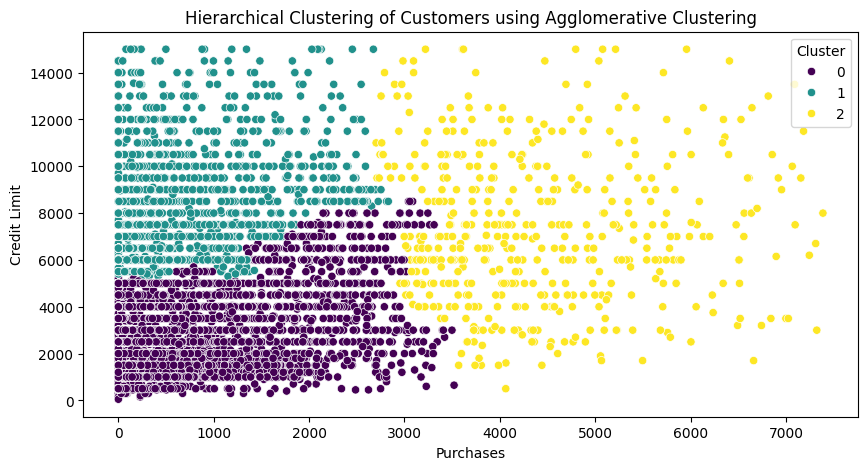

In [220]:
# Plot the clusters 
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', data=df_zscore, palette='viridis') 
plt.title('Hierarchical Clustering of Customers using Agglomerative Clustering') 
plt.xlabel('Purchases') 
plt.ylabel('Credit Limit') 
plt.show()

**Perform partitional clustering using the K-means algorithm. Then, plot the clusters**

In [221]:
df_zscore_kmean = df_cleaned_zscores.copy()

In [234]:
kmeans = KMeans(n_clusters=7, random_state=42) 
df_zscore_kmean['Cluster'] = kmeans.fit_predict(df_zscores_scaled)

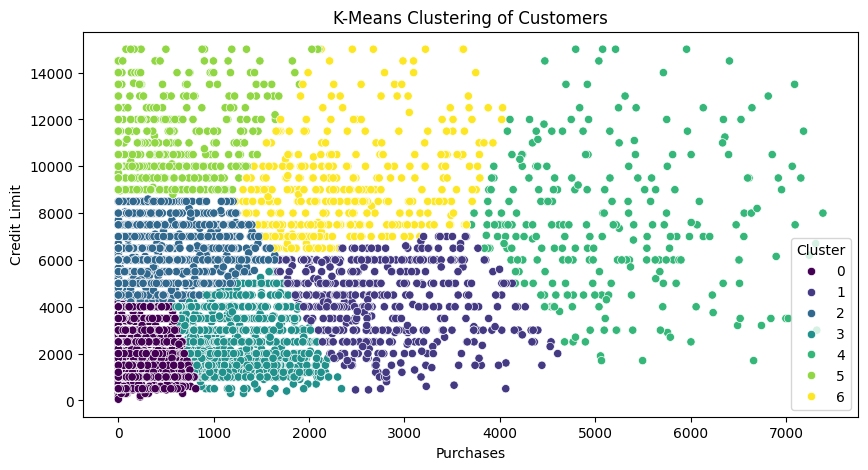

In [235]:
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', data=df_zscore_kmean, palette='viridis') 
plt.title('K-Means Clustering of Customers') 
plt.xlabel('Purchases') 
plt.ylabel('Credit Limit') 
plt.show()

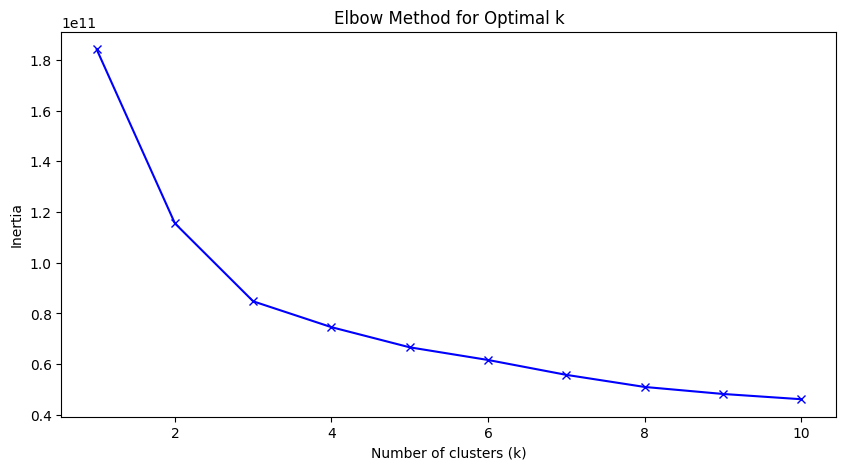

In [231]:
# Best K-Means

sum_of_scared_distances = [] 
K = range(1, 11) 
for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_zscore_kmean) 
    sum_of_scared_distances.append(kmeans.inertia_) 
    
# Plot the Elbow curve 
plt.figure(figsize=(10, 5)) 
plt.plot(K, sum_of_scared_distances, 'bx-') 
plt.xlabel('Number of clusters (k)') 
plt.ylabel('Inertia') 
plt.title('Elbow Method for Optimal k') 
plt.show()

In [236]:
best_k = 3 
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_zscore_kmean['Cluster'] = kmeans.fit_predict(df_zscores_scaled)


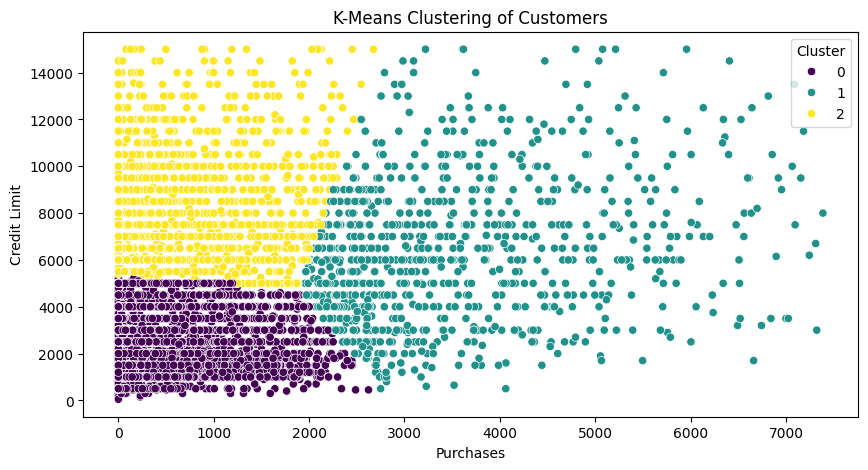

In [237]:
plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', data=df_zscore_kmean, palette='viridis') 
plt.title('K-Means Clustering of Customers') 
plt.xlabel('Purchases') 
plt.ylabel('Credit Limit') 
plt.show()

- Cluster 0 Purple : This cluster primarily consists of customers with lower purchases and lower credit limits.
- Cluster 1 Yellow : This cluster includes customers with lower purchases but higher credit limits.
- Cluster 2 Green : This cluster contains customers with higher purchases and a wide range of credit limits.